In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
#how logistic regression does prediction with confusion matrix
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#load the dataset
data = pd.read_csv("green_tech_data.csv")

In [7]:
data.head() #prints first 5 rows


,carbon_emissions,energy_output,renewability_index,cost_efficiency,sustainability
0,181.089042,128.286267,0.642032,0.732568,1
1,382.750007,672.769370,0.084140,2.891096,0
2,306.197880,382.920383,0.161629,2.932858,0
3,259.530469,557.713622,0.898554,3.368435,0
4,104.606524,916.809827,0.606429,3.767411,0


In [8]:
#our target y is to find whether it is sustainable or not..
#check missing values

print(data.isnull().sum())

carbon_emissions      0
energy_output         0
renewability_index    0
cost_efficiency       0
sustainability        0
dtype: int64


In [9]:
#dta.fillna(data.mean(), inplace=true)

In [12]:
#Example feature selection
X = data[["carbon_emissions",	"energy_output",	"renewability_index",	"cost_efficiency"]]
Y = data["sustainability"] #target variable

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression()
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [15]:
Y_pred = model.predict(X_test)

In [16]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [19]:
#Accuracy Score
accuracy = accuracy_score(Y_test, Y_pred) #accuracy score is a library
print("Accuracy: ",accuracy)

Accuracy:  0.95


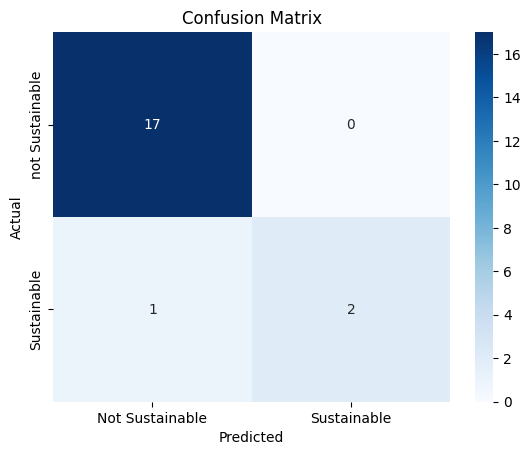

In [20]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Sustainable", "Sustainable"],
            yticklabels=["not Sustainable", "Sustainable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [21]:
#Classification Report
print(classification_report(Y_test,Y_pred, target_names=["Not Sustainable", "Sustainable"]))

                 precision    recall  f1-score   support

Not Sustainable       0.94      1.00      0.97        17
    Sustainable       1.00      0.67      0.80         3

       accuracy                           0.95        20
      macro avg       0.97      0.83      0.89        20
   weighted avg       0.95      0.95      0.95        20



In [22]:
#Feature importance
coefficients = pd.DataFrame(model.coef_.T, index=X.columns,
                            columns=["Coefficient"]) 
print(coefficients)

                    Coefficient
carbon_emissions      -0.023347
energy_output          0.001097
renewability_index     1.092184
cost_efficiency       -1.259560


In [23]:
import joblib
# Save the model in a file
joblib.dump(model, "lrmodel_sustainable.pkl")

['lrmodel_sustainable.pkl']